# Validation
On valide les matrices en 2d et en 3d.
D'abord on choisit une dimension on laisse les calcules dans cette dimension en C en enregistrons tout les matrices de sortie et on change la dimension dans les parametres python a celle qu'on a choisi en c et on lance tout les validation dans ce notebook puis on change la dimension et on refait cette procedure

## Calcul en Python de local_support BF_support et IND_mask_active

In [5]:
from compliance_mM import *
from volume_mM import *
import numpy as np
from local_Support_mM import *
from local_Support_mM import local_support_fun
op_dir = os.path.join(WD, OP, problem_name)
### Reading files ##
ELEMENTS = np.loadtxt('ELEMENTS.dat')



scale = 'standard'
IND_mask = np.loadtxt("IND_mask_test.dat",dtype=int)
IND_mask_tot = np.loadtxt('IND_mask_tot_test.dat',dtype=int)
U1 = np.loadtxt('U1.dat')
U2 = np.loadtxt('U2.dat')
U3 = np.loadtxt('U3.dat')



#It's faster to compute BF_support than read it
print("calcul local_support_fun")
local_support, BF_support, IND_mask_active = local_support_fun(ELEMENTS, IND_mask, IND_mask_tot, U1, U2, U3, scale)

calcul local_support_fun


## Validation local_support

### lire local_support

In [2]:
with open("local_Support_c.txt", "r") as fichier:
    lignes = fichier.readlines()  # Lire toutes les lignes du fichier

local_c = []  # Initialiser une liste vide pour stocker les vecteurs

# Parcourir chaque ligne et transformer les valeurs en entiers (ou flottants si nécessaire)
for ligne in lignes:
    valeurs = [int(valeur) for valeur in ligne.strip().split()]  # Divisez la ligne en valeurs et convertissez-les en entiers
    local_c.append(valeurs)

### visualiser les longeurs avant de comparer par le programme

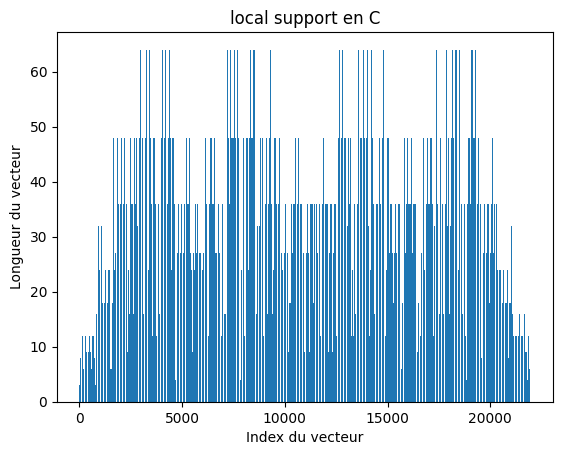

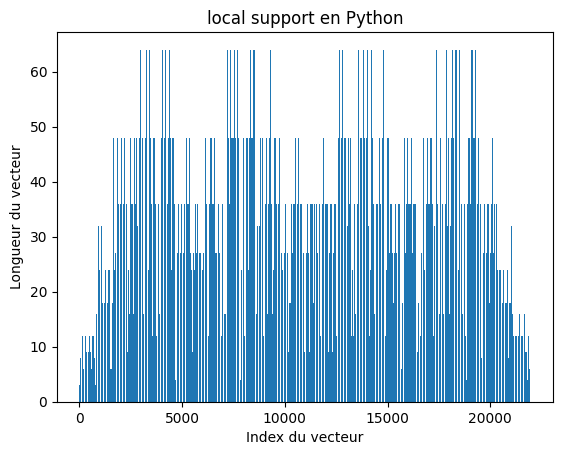

In [3]:
import matplotlib.pyplot as plt
longueurs = [len(vecteur) for vecteur in local_c]

# Créez un graphique à barres pour représenter les longueurs
plt.bar(range(len(longueurs)), longueurs)

# Définissez les étiquettes des axes
plt.xlabel('Index du vecteur')
plt.ylabel('Longueur du vecteur')
plt.title("local support en C")

# Affichez le graphique
plt.show()
longueurs = [len(vecteur) for vecteur in local_support]

# Créez un graphique à barres pour représenter les longueurs
plt.bar(range(len(longueurs)), longueurs)

# Définissez les étiquettes des axes
plt.xlabel('Index du vecteur')
plt.ylabel('Longueur du vecteur')
plt.title("local support en Python")
# Affichez le graphique
plt.show()

In [5]:
import numpy as np
are_equal = np.array_equal(local_c, local_support)

if are_equal:
    print("The two list are Equal.")
else:
    print("The two list aren't Equal.")

The two list are Equal.


## Validation IND Mask active

### Lire le vecteur C

In [8]:
IND_mask_active_c = []

# Ouvrir le fichier en mode lecture
with open("IND_mask_active_c.txt", "r") as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Convertir la ligne en un nombre (int ou float) et l'ajouter à la liste
        # Utilisez float(ligne.strip()) si les nombres sont des flottants
        IND_mask_active_c.append(int(float(ligne.strip())))


In [9]:
import numpy as np
are_equal = np.array_equal(IND_mask_active_c, IND_mask_active)

if are_equal:
    print("The two list are Equal.")
else:
    print("The two list aren't Equal.")

The two list are Equal.


## Validation BF_Support

### fonction pour lire nos matrice sparse

In [11]:
import numpy as np
from scipy.sparse import coo_matrix

def read_coo_matrix_chp(filename):
    with open(filename, 'r') as file:
        # Lire les dimensions et le nombre d'éléments non nuls
        rows, cols, depth, non_zero_count = map(int, file.readline().split())

        # Initialiser les listes pour les valeurs et les indices
        data = []
        row_indices = []
        col_indices = []

        # Lire les éléments non nuls
        for _ in range(non_zero_count):
            r, c, val = file.readline().split()
            row_indices.append(int(r))
            col_indices.append(int(c))
            data.append(float(val))

    # Créer la matrice COO
    return coo_matrix((data, (row_indices, col_indices)), shape=(rows, cols)).toarray()

# Utilisation de la fonction
# coo_mat = read_coo_matrix_chp('nom_de_votre_fichier.txt')


### Lecture de la matrice COO

In [12]:
BF_support_c=read_coo_matrix_chp('BF_Support_c.txt')


### Fonction pour comparer les deux matrices (on les a rendu dense donc chacune a une memoire de 4.5Go donc on separe les comparaison)

In [13]:
import numpy as np

def compare_large_matrice(array1, array2, chunk_size, atol):
    # Vérifier si les formes des tableaux sont identiques
    if array1.shape != array2.shape:
        return False

    rows, cols = array1.shape
    # Parcourir les tableaux ligne par ligne
    for i in range(0, rows, chunk_size):
        # Déterminer la fin du segment actuel
        end_i = min(i + chunk_size, rows)

        # Comparer les segments des deux tableaux
        if not np.isclose(array1[i:end_i], array2[i:end_i], atol=atol).all():
            return False

    return True

In [14]:
print(BF_support[0,0:20])
print(BF_support_c[0,0:20])

[0.03311052 0.06032072 0.0096811  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.03311052 0.06032072 0.0096811  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [18]:
chunk_size = 1000  
atol=1e-10
are_consistent = compare_large_matrice(BF_support_c, BF_support, chunk_size, atol)


if are_consistent:
    print("Both results are consistent.")
else:
    print("There is a discrepancy between the results.")

Both results are consistent.


## Calcul Der_Topo
Si il y'as un probleme d'allocation relancer le notebook et lancer la premiere cellule puis revenir a celle la pour ne pas stocker les autres variables

In [8]:
del BF_support_c, IND_mask_active_c, local_c, U1,U2,U3,ELEMENTS

### verification memoire
Le code python a besoin d'au moins 8Gb de Ram si vous n'avez pas plus ca risque de ne pas marcher

In [9]:
import psutil

# Obtenir la mémoire disponible
mem = psutil.virtual_memory()
print(f"Mémoire disponible : {mem.available / (1024 * 1024 * 1024):.2f} GB")

Mémoire disponible : 6.97 GB


In [7]:

### Not the most efficient to read rho_e, but ensures it has the right dimension for brodcasting operations (number of elements,1)

rho_temp = np.loadtxt('rho_e_test.dat')
rho_e = np.zeros((len(rho_temp),1))
rho_e[:,0] = rho_temp
scale = 'standard'
### P_rho and W are 3D arrays that were saved as 2D arrays, we thus must reshape them after reading
P_rho = np.loadtxt('P_rho_test.dat').reshape(28,28,28)
W = np.loadtxt('W_test.dat').reshape(28,28,28)
der_CP, der_W, BF_mask=der_NURBS(local_support,BF_support,IND_mask_active,IND_mask,IND_mask_tot,P_rho,W,rho_e)



Important:
(27000, 21952)


## Validation BF_mask

In [11]:
BF_mask_c = []

# Ouvrir le fichier en mode lecture
with open("BF_mask_c.txt", "r") as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Convertir la ligne en un nombre (int ou float) et l'ajouter à la liste
        # Utilisez float(ligne.strip()) si les nombres sont des flottants
        BF_mask_c.append(int(float(ligne.strip())))


In [12]:
import numpy as np
are_equal = np.array_equal(BF_mask_c, BF_mask)

if are_equal:
    print("The two list are Equal.")
else:
    print("The two list aren't Equal.")

The two list are Equal.


In [13]:
del BF_mask, BF_mask_c

## Validation der_W

### Lire la matrice COO

In [14]:
import numpy as np
from scipy.sparse import coo_matrix

def read_coo_matrix_chp(filename):
    with open(filename, 'r') as file:
        # Lire les dimensions et le nombre d'éléments non nuls
        rows, cols, depth, non_zero_count = map(int, file.readline().split())

        # Initialiser les listes pour les valeurs et les indices
        data = []
        row_indices = []
        col_indices = []

        # Lire les éléments non nuls
        for _ in range(non_zero_count):
            r, c, val = file.readline().split()
            row_indices.append(int(r))
            col_indices.append(int(c))
            data.append(float(val))

    # Créer la matrice COO
    return coo_matrix((data, (row_indices, col_indices)), shape=(rows, cols)).toarray()

# Utilisation de la fonction
# coo_mat = read_coo_matrix_chp('nom_de_votre_fichier.txt')


In [15]:
der_W_c=read_coo_matrix_chp('der_W_c.txt')


In [16]:
import numpy as np

def compare_large_matrice(array1, array2, chunk_size, atol):
    # Vérifier si les formes des tableaux sont identiques
    if array1.shape != array2.shape:
        return False

    rows, cols = array1.shape
    # Parcourir les tableaux ligne par ligne
    for i in range(0, rows, chunk_size):
        # Déterminer la fin du segment actuel
        end_i = min(i + chunk_size, rows)

        # Comparer les segments des deux tableaux
        if not np.isclose(array1[i:end_i], array2[i:end_i], atol=atol).all():
            return False

    return True

In [17]:
print(der_W_c[0,0:20])
print(der_W[0,0:20])

[ 8.782256e-10  3.397648e-09 -7.681828e-11  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
[8.78225664e-10 1.59995084e-09 2.56782257e-10 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [20]:
chunk_size = 1000  
atol=1e-7
are_consistent = compare_large_matrice(der_W_c, der_W, chunk_size, atol)


if are_consistent:
    print("Both results are consistent.")
else:
    print("There is a discrepancy between the results.")

Both results are consistent.


In [21]:
del der_W_c, der_W

## Validation der_CP

In [22]:
der_CP_c=read_coo_matrix_chp('der_CP_c.txt')


In [24]:
print(der_CP_c[0,0:20])
print(der_CP[0,0:20])

[0.03311052 0.06032072 0.0096811  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.03311052 0.06032072 0.0096811  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [25]:
chunk_size = 1000  
atol=1e-9
are_consistent = compare_large_matrice(der_CP_c, der_CP, chunk_size, atol)


if are_consistent:
    print("Both results are consistent.")
else:
    print("There is a discrepancy between the results.")

Both results are consistent.
